## kerasでDAを作ってみよう

In [2]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

/usr/local/Cellar/python3/3.6.1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/usr/local/Cellar/python3/3.6.1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [3]:
batch_size = 128
nb_classes = 10
nb_epoch = 5

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
#x_train = np.reshape(x_train, (len(x_train), 1, 28, 28))
#x_test = np.reshape(x_test, (len(x_test), 1, 28, 28))
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [5]:
noise_factor = 0.5
# 平均0、標準偏差1の正規分布
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0., scale=1., size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0., scale=1., size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [6]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(16, activation='relu')(encoded)
 
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [7]:
autoencoder = Model(inputs=input_img, outputs=decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [11]:
history = autoencoder.fit(x_train_noisy, x_train,
                epochs=nb_epoch,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 84us/step - loss: 0.2289 - val_loss: 0.2268
Epoch 2/5
60000/60000 [==============================] - 4s 68us/step - loss: 0.2246 - val_loss: 0.2210
Epoch 3/5
60000/60000 [==============================] - 4s 71us/step - loss: 0.2182 - val_loss: 0.2122
Epoch 4/5
60000/60000 [==============================] - 4s 67us/step - loss: 0.2106 - val_loss: 0.2058
Epoch 5/5
60000/60000 [==============================] - 5s 76us/step - loss: 0.2038 - val_loss: 0.2005


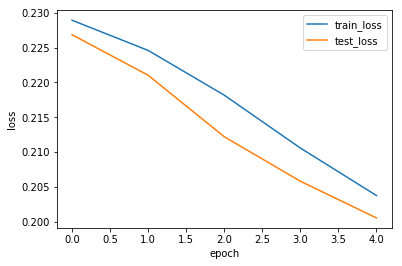

In [12]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='test_loss')

plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()
plt.clf()

In [9]:
# テスト画像を変換
decoded_imgs = autoencoder.predict(x_test_noisy)

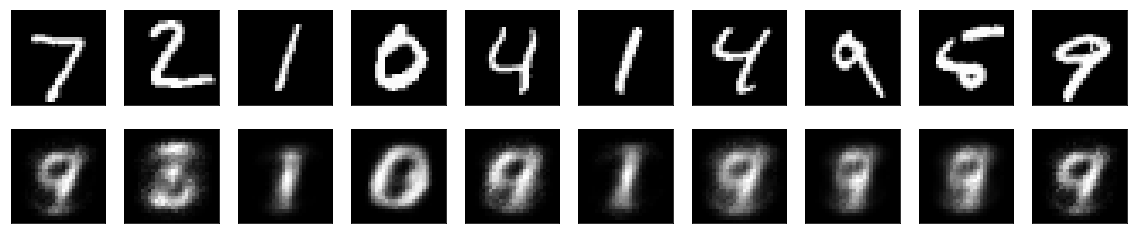

In [10]:
# 何個表示するか
n = 10
plt.figure(figsize=(20, 4))

for i in range(n):
    # オリジナルのテスト画像を表示
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 変換された画像を表示
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()
plt.clf()